In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.integrate import solve_ivp

# Sistema LasR/LasI

\begin{equation}
    \dot{[lasR]} = \kappa_{lasR} - 
    [lasR]\gamma_{lasR}
\end{equation}

\begin{equation}
    \dot{[LasR]} = [lasR]\kappa_{LasR} + 
    [LasR{\cdot}AI_{1}]\sigma_{LasR{\cdot}AI1} - 
    [AI_{1}][LasR]\kappa_{LasR\cdot AI1} -
    [LasR]\gamma_{LasR}
\end{equation}

\begin{equation}
    \dot{[lasI]} = \alpha_{lasI} + 
    \frac{\beta_{lasI}}{1+\left(\frac{[LasR{\cdot}AI_{1}]}{K_{1}}\right)^{h_{1}}} - 
    [lasI]\gamma_{lasI}
\end{equation}

\begin{equation}
    \dot{[LasI]} = [lasI]\kappa_{LasI} - 
    [LasI]\gamma_{LasI}
\end{equation}

\begin{equation}
    \dot{[AI_{1}]} = [LasI]\kappa_{AI1} + 
    [LasR{\cdot}AI_{1}]\sigma_{LasR{\cdot}AI1} - 
    (d(AI_{1}-AI_{1ext})) -
    [AI_1]\gamma_{AI1}
\end{equation}

\begin{equation}
    \dot{[AI_{1ext}]} = (N\cdot d(AI_{1}-AI_{1ext})) -
    [AI_{1ext}](\gamma_{AI1ext}+d_{away})
\end{equation}

\begin{equation}
    \dot{[LasR{\cdot}AI_{1}]} = [AI_{1}][LasR]\kappa_{LasR{\cdot}AI1} -
    [LasR{\cdot}AI_{1}](\gamma_{LasR{\cdot}AI1} + 
    \sigma_{LasR{\cdot}AI1})
\end{equation}

In [2]:
def qs_deterministic_model(t, r):
    # lasR, LasR, lasI, LasI, AI1, AI1_ext, LasRAI1, p, P = r
    lasR, LasR, lasI, LasI, AI1, AI1_ext, LasRAI1 = r
    
    k_lasR = 0.004
    g_lasR = 0.002
    k_LasR = 0.4
    g_LasR = 0.35
    a_lasI = 0.00036
    b_lasI = 0.0058
    K1 = 1.2
    h1 = -1.4
    g_lasI = 0.001
    k_LasI = 0.7
    g_LasI = 0.12
    k_AI1 = 1
    g_AI1 = 0.3
    k_LasRAI1 = 0.05
    g_LasRAI1 = 0.14
    s_LasRAI1 = 0.25
    d = 0.8
    d_away = 1.2
    g_AI1_ext = 0.8
    N = 10
    
    dlasR = k_lasR - lasR*g_lasR
    dLasR = lasR*k_LasR + LasRAI1*s_LasRAI1 - AI1*LasR*k_LasRAI1 - LasR*g_LasR
    dlasI = a_lasI + (b_lasI/(1+(LasRAI1/K1)**h1)) - lasI*g_lasI
    dLasI = lasI*k_LasI - LasI*g_LasI
    dAI1 = LasI*k_AI1 + LasRAI1*s_LasRAI1 - (d*(AI1-AI1_ext)) - AI1*g_AI1
    dAI1_ext = (N*d*(AI1-AI1_ext)) - (AI1_ext*(g_AI1_ext + d_away))
    dLasRAI1 = AI1*LasR*k_LasRAI1 - (LasRAI1*(g_LasRAI1 + s_LasRAI1))
    
    return np.array([dlasR, dLasR, dlasI, dLasI, dAI1, dAI1_ext, dLasRAI1])

In [3]:
qs_deterministic_dynamics = solve_ivp(qs_deterministic_model, [0, 100], [1, 1, 1, 1, 1, 1, 1])

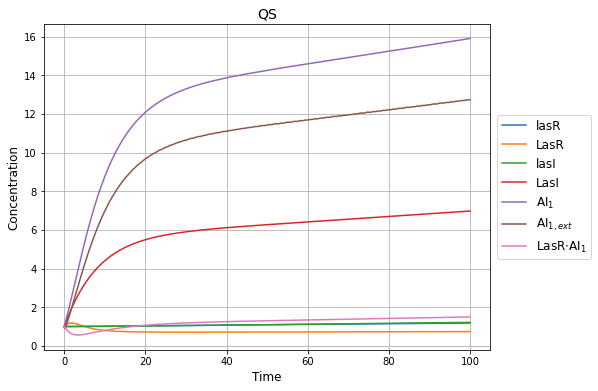

In [4]:
plt.figure(figsize=(8,6))
plt.plot(qs_deterministic_dynamics.t, qs_deterministic_dynamics.y[0], label='lasR')
plt.plot(qs_deterministic_dynamics.t, qs_deterministic_dynamics.y[1], label='LasR')
plt.plot(qs_deterministic_dynamics.t, qs_deterministic_dynamics.y[2], label='lasI')
plt.plot(qs_deterministic_dynamics.t, qs_deterministic_dynamics.y[3], label='LasI') 
plt.plot(qs_deterministic_dynamics.t, qs_deterministic_dynamics.y[4], label='AI$_1$')
plt.plot(qs_deterministic_dynamics.t, qs_deterministic_dynamics.y[5], label='AI$_{1,ext}$')
plt.plot(qs_deterministic_dynamics.t, qs_deterministic_dynamics.y[6], label='LasR$\cdot$AI$_1$')
# plt.plot(qs_deterministic_dynamics.t, qs_deterministic_dynamics.y[7], label='p')
# plt.plot(qs_deterministic_dynamics.t, qs_deterministic_dynamics.y[8], label='P')
plt.grid()
plt.legend(loc='center right', bbox_to_anchor=(1.24, 0.50), ncol=1, fancybox=True, shadow=False, fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Concentration', fontsize=12)
plt.title('QS', fontsize=14)
plt.show()

# Sistema LasR/LasI y RhlR/RhlI


\begin{equation}
    \dot{[lasR]} = \kappa_{lasR} - 
    [lasR]\gamma_{lasR}
\end{equation}

\begin{equation}
    \dot{[LasR]} = [lasR]\kappa_{LasR} + 
    [LasR{\cdot}AI_{1}]\sigma_{LasR{\cdot}AI1} - 
    [AI_{1}][LasR]\kappa_{LasR\cdot AI1} -
    [LasR]\gamma_{LasR}
\end{equation}

\begin{equation}
    \dot{[lasI]} = \alpha_{lasI} + 
    \frac{\beta_{lasI}}{1+\left(\frac{[LasR{\cdot}AI_{1}]}{K_{1}}\right)^{h_{1}}} - 
    [lasI]\gamma_{lasI}
\end{equation}

\begin{equation}
    \dot{[LasI]} = [lasI]\kappa_{LasI} - 
    [LasI]\gamma_{LasI}
\end{equation}

\begin{equation}
    \dot{[AI_{1}]} = [LasI]\kappa_{AI1} + 
    [LasR{\cdot}AI_{1}]\sigma_{LasR{\cdot}AI1} - 
    (d(AI_{1}-AI_{1ext})) -
    [AI_1]\gamma_{AI1}
\end{equation}

\begin{equation}
    \dot{[AI_{1ext}]} = (N\cdot d(AI_{1}-AI_{1ext})) -
    [AI_{1ext}](\gamma_{AI1ext}+d_{away})
\end{equation}

\begin{equation}
    \dot{[LasR{\cdot}AI_{1}]} = [AI_{1}][LasR]\kappa_{LasR{\cdot}AI1} -
    [LasR{\cdot}AI_{1}](\gamma_{LasR{\cdot}AI1} + 
    \sigma_{LasR{\cdot}AI1})
\end{equation}

\begin{equation}
    \dot{[rhlR]} = \alpha_{rhlR} + 
    \frac{\beta_{rhlR}}{1+\left(\frac{[LasR{\cdot}AI_{1}]}{K_{2}}\right)^{h_{2}}} - 
    [rhlR]\gamma_{rhlR}
\end{equation}

\begin{equation}
    \dot{[RhlR]} = [rhlR]\kappa_{RhlR} +
    [RhlR\cdot AI_2]\sigma_{RhlR\cdot AI2} -
    [AI_2][RhlR]\kappa_{RhlR\cdot AI2} -
    [RhlR]\gamma_{RhlR}
\end{equation}

\begin{equation}
    \dot{[rhlI]} = \alpha_{rhlI} + 
    \frac{\beta_{rhlI}}{1+\left(\frac{[LasR{\cdot}AI_{1}]}{K_{3}}\right)^{h_{3}}} + 
    \frac{\beta_{rhlI}}{1+\left(\frac{[RhlR{\cdot}AI_{2}]}{K_{4}}\right)^{h_{4}}} - 
    [rhlI]\gamma_{rhlI}
\end{equation}

\begin{equation}
    \dot{[RhlI]} = [rhlI]\kappa_{RhlI} - 
    [RhlI]\gamma_{RhlI}
\end{equation}

\begin{equation}
    \dot{[AI_{2}]} = [RhlI]\kappa_{AI2} + 
    [RhlR{\cdot}AI_{2}]\sigma_{RhlR{\cdot}AI2} - 
    (d(AI_{2}-AI_{2ext})) -
    [AI_2]\gamma_{AI2}
\end{equation}

\begin{equation}
    \dot{[AI_{2ext}]} = (N\cdot d(AI_{2}-AI_{2ext})) -
    [AI_{2ext}](\gamma_{AI2ext}+d_{away})
\end{equation}

\begin{equation}
    \dot{[RhlR{\cdot}AI_{2}]} = [AI_{2}][RhlR]\kappa_{RhlR{\cdot}AI2} - 
    [RhlR{\cdot}AI_{2}](\gamma_{RhlR{\cdot}AI2} + \sigma_{RhlR{\cdot}AI2})
\end{equation}

\begin{equation}
    \dot{[p]} = \alpha_{p} + 
    \frac{\beta_{p}}{1+\left(\frac{[RhlR{\cdot}AI_{2}]}{K_{5}}\right)^{h_{5}}} - 
    [p]\gamma_{p}
\end{equation}

\begin{equation}
    \dot{[P]} = [p]\kappa_{P} - 
    [P]\gamma_{P}
\end{equation}

In [5]:
def qs_deterministic_model(t, r):
    lasR, LasR, lasI, LasI, AI1, AI1_ext, LasRAI1, rhlR, RhlR, rhlI, RhlI, AI2, AI2_ext, RhlRAI2, p, P = r
    
    # LasR/LasI
    k_lasR = 0.004
    g_lasR = 0.002
    k_LasR = 0.4
    g_LasR = 0.35
    a_lasI = 0.00036
    b_lasI = 0.0058
    K1 = 1.2
    h1 = -1.4
    g_lasI = 0.001
    k_LasI = 0.7
    g_LasI = 0.12
    k_AI1 = 1
    g_AI1 = 0.3
    k_LasRAI1 = 0.05
    g_LasRAI1 = 0.14
    s_LasRAI1 = 0.25
    g_AI1_ext = 0.8
    # RhlR/RhlI
    a_rhlR = 0
    b_rhlR = 0.0045
    K2 = 1.5
    h2 = -1.2
    g_rhlR = 0.002
    k_RhlR = 0.4
    g_RhlR = 0.35
    a_rhlI = 0.00036
    b_rhlI = 0.0058
    K3 = 1.5
    h3 = -1.2
    K4 = 1.2
    h4 = -1.4
    g_rhlI = 0.001
    k_RhlI = 0.7
    g_RhlI = 0.12
    k_AI2 = 1
    g_AI2 = 0.3
    k_RhlRAI2 = 0.05
    g_RhlRAI2 = 0.14
    s_RhlRAI2 = 0.25
    g_AI2_ext = 0.8
    # Target protein
    a_p = 0
    b_p = 0.0058
    K5 = 1.2
    h5 = -1.4
    g_p = 0.001
    k_P = 0.7
    g_P = 0.12
    # Cell parameters
    d = 0.8
    d_away = 1.2
    N = 10
    
    dlasR = k_lasR - lasR*g_lasR
    dLasR = lasR*k_LasR + LasRAI1*s_LasRAI1 - AI1*LasR*k_LasRAI1 - LasR*g_LasR
    dlasI = a_lasI + (b_lasI/(1+(LasRAI1/K1)**h1)) - lasI*g_lasI
    dLasI = lasI*k_LasI - LasI*g_LasI
    dAI1 = LasI*k_AI1 + LasRAI1*s_LasRAI1 - (d*(AI1-AI1_ext)) - AI1*g_AI1
    dAI1_ext = (N*d*(AI1-AI1_ext)) - (AI1_ext*(g_AI1_ext + d_away))
    dLasRAI1 = AI1*LasR*k_LasRAI1 - (LasRAI1*(g_LasRAI1 + s_LasRAI1))
    drhlR = a_rhlR + (b_rhlR/(1+(LasRAI1/K2)**h2)) - rhlR*g_lasR
    dRhlR = rhlR*k_RhlR + RhlRAI2*s_RhlRAI2 - AI1*RhlR*k_RhlRAI2 - RhlR*g_RhlR
    drhlI = a_rhlI + (b_rhlI/(1+(LasRAI1/K3)**h3)) + (b_rhlI/(1+(RhlRAI2/K4)**h4)) - rhlI*g_rhlI
    dRhlI = rhlI*k_RhlI - RhlI*g_RhlI
    dAI2 = RhlI*k_AI2 + RhlRAI2*s_RhlRAI2 - (d*(AI2-AI2_ext)) - AI2*g_AI1
    dAI2_ext = (N*d*(AI2-AI2_ext)) - (AI2_ext*(g_AI2_ext + d_away))
    dRhlRAI2 = AI2*RhlR*k_RhlRAI2 - (RhlRAI2*(g_RhlRAI2 + s_RhlRAI2))
    dp = a_p + (b_p/(1+(RhlRAI2/K5)**h5)) - p*g_p
    dP = p*k_P - P*g_P
    
    return np.array([dlasR, dLasR, dlasI, dLasI, dAI1, dAI1_ext, dLasRAI1, drhlR, dRhlR, drhlI, dRhlI, dAI2, dAI2_ext, dRhlRAI2, dp, dP])

In [6]:
qs_deterministic_dynamics = solve_ivp(qs_deterministic_model, [0, 100], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

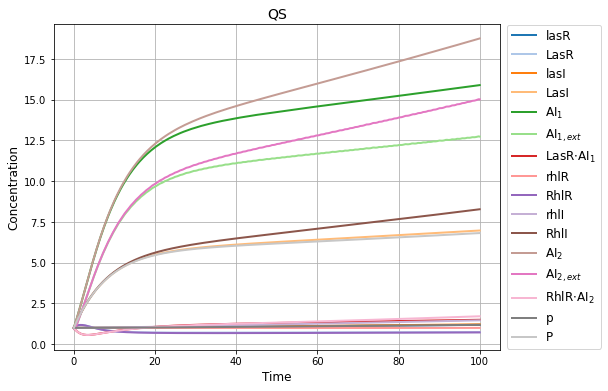

In [7]:
plt.figure(figsize=(8,6))
plt.set_cmap('tab20')
plt.plot(qs_deterministic_dynamics.t, qs_deterministic_dynamics.y[0], lw=2, label='lasR', color=cm.tab20(0))
plt.plot(qs_deterministic_dynamics.t, qs_deterministic_dynamics.y[1], lw=2, label='LasR', color=cm.tab20(1))
plt.plot(qs_deterministic_dynamics.t, qs_deterministic_dynamics.y[2], lw=2, label='lasI', color=cm.tab20(2))
plt.plot(qs_deterministic_dynamics.t, qs_deterministic_dynamics.y[3], lw=2, label='LasI', color=cm.tab20(3)) 
plt.plot(qs_deterministic_dynamics.t, qs_deterministic_dynamics.y[4], lw=2, label='AI$_1$', color=cm.tab20(4))
plt.plot(qs_deterministic_dynamics.t, qs_deterministic_dynamics.y[5], lw=2, label='AI$_{1,ext}$', color=cm.tab20(5))
plt.plot(qs_deterministic_dynamics.t, qs_deterministic_dynamics.y[6], lw=2, label='LasR$\cdot$AI$_1$', color=cm.tab20(6))
plt.plot(qs_deterministic_dynamics.t, qs_deterministic_dynamics.y[7], lw=2, label='rhlR', color=cm.tab20(7))
plt.plot(qs_deterministic_dynamics.t, qs_deterministic_dynamics.y[8], lw=2, label='RhlR', color=cm.tab20(8))
plt.plot(qs_deterministic_dynamics.t, qs_deterministic_dynamics.y[9], lw=2, label='rhlI', color=cm.tab20(9))
plt.plot(qs_deterministic_dynamics.t, qs_deterministic_dynamics.y[10], lw=2, label='RhlI', color=cm.tab20(10)) 
plt.plot(qs_deterministic_dynamics.t, qs_deterministic_dynamics.y[11], lw=2, label='AI$_2$', color=cm.tab20(11))
plt.plot(qs_deterministic_dynamics.t, qs_deterministic_dynamics.y[12], lw=2, label='AI$_{2,ext}$', color=cm.tab20(12))
plt.plot(qs_deterministic_dynamics.t, qs_deterministic_dynamics.y[13], lw=2, label='RhlR$\cdot$AI$_2$', color=cm.tab20(13))
plt.plot(qs_deterministic_dynamics.t, qs_deterministic_dynamics.y[14], lw=2, label='p', color=cm.tab20(14))
plt.plot(qs_deterministic_dynamics.t, qs_deterministic_dynamics.y[15], lw=2, label='P', color=cm.tab20(15))
plt.grid()
plt.legend(loc='center right', bbox_to_anchor=(1.24, 0.50), ncol=1, fancybox=True, shadow=False, fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Concentration', fontsize=12)
plt.title('QS', fontsize=14)
plt.show()